In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [4]:
# Createing the .kaggle directory and coping the Kaggle API credentials file
mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats #Downloading the Dataset using Kaggle API Token

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:08<00:00, 217MB/s]
100% 1.06G/1.06G [00:08<00:00, 134MB/s]


In [6]:
# Import the 'zipfile' module to work with ZIP files
import zipfile

# Open the 'dogs-vs-cats.zip' file in read mode
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')

# Extract all the contents of the ZIP file to the current directory
zip_ref.extractall('/content')

# Close the ZIP file
zip_ref.close()

In [7]:
#Importing the necessary files
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
# generators
# Create training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# Create validation dataset
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalization
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# Creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary() #Summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
# Train the model for 10 epochs using the training dataset and validate on the validation dataset

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 102ms/step - loss: 1.3856 - accuracy: 0.5918 - val_loss: 0.6275 - val_accuracy: 0.6470
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 0.5602 - accuracy: 0.7150 - val_loss: 0.5663 - val_accuracy: 0.7106
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4865 - accuracy: 0.7699 - val_loss: 0.4701 - val_accuracy: 0.7724
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4131 - accuracy: 0.8129 - val_loss: 0.4446 - val_accuracy: 0.7938
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3630 - accuracy: 0.8396 - val_loss: 0.4330 - val_accuracy: 0.8026
Epoch 6/10
625/625 [==============================] - 65s 102ms/step - loss: 0.2959 - accuracy: 0.8729 - val_loss: 0.5131 - val_accuracy: 0.7710
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2131 - accuracy: 0.9130 - val_loss: 0.5331 - val_ac

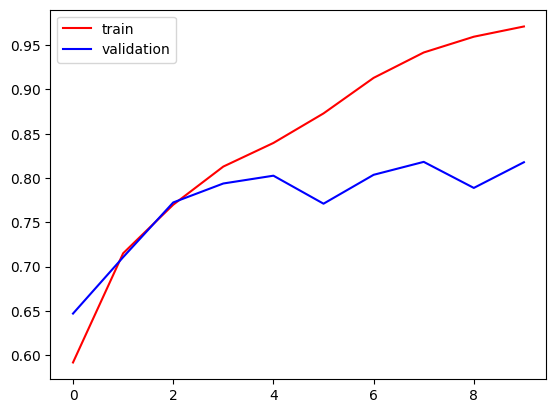

In [14]:
#Plot the training accuracy and validation accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

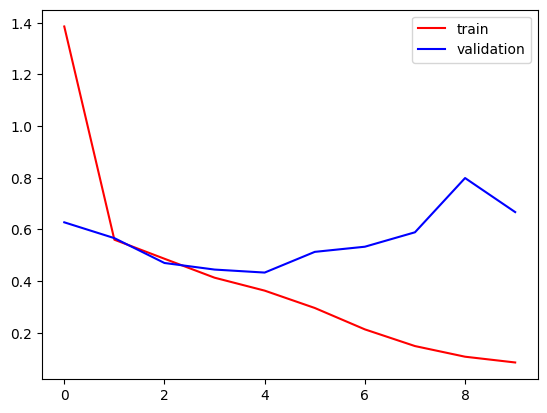

In [16]:
#Plot the training loss and validation loss

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
# Import the OpenCV library (cv2) for computer vision tasks
import cv2

In [23]:
# Read an image file named 'cat.10007.jpg' from the '/content/test/cats/' directory

test_img = cv2.imread('/content/test/cats/cat.10007.jpg')

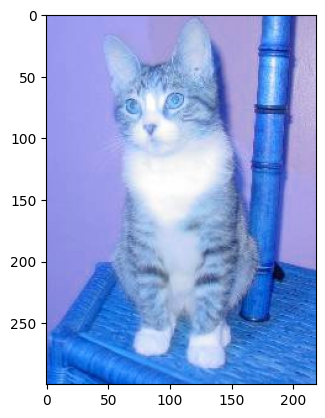

In [24]:
plt.imshow(test_img) #Show the test image

In [25]:
test_img.shape  #Dimension of the image

(300, 219, 3)

In [26]:
# Resize the 'test_img' to a 256x256 pixel size

test_img = cv2.resize(test_img,(256,256))

In [27]:
# Reshape the test_img array to have dimensions (1, 256, 256, 3)

test_input = test_img.reshape((1,256,256,3))

In [28]:
# Predict using the model on the reshaped test input

model.predict(test_input)

1/1 [==============================] - 0s 398ms/step


array([[0.]], dtype=float32)